Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



csv file into dataframe

In [2]:
df = pd.read_csv('./capstone_train.csv')

sample data of dataset

In [3]:
df.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,Assassin vine
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,Assassin vine
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,Ascomoid
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,Assassin vine
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,Assassin vine


In [4]:
df.tail()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
464804,3060,292,5,510,105,787,205,NaN,172,918,22,2,Assassin vine
464805,3149,45,16,240,31,2736,223,203.0,110,1090,22,3,Ascomoid
464806,3155,63,6,313,42,3804,226,227.0,135,3305,29,1,Ascomoid
464807,2813,200,12,201,22,2014,215,NaN,168,2151,26,3,Assassin vine
464808,2774,187,22,470,38,1284,217,250.0,156,787,13,3,Assassin vine


In [5]:
df.shape

(464809, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464809 entries, 0 to 464808
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Heigh_From_Sea_Level               464809 non-null  int64  
 1   Aspect                             464809 non-null  int64  
 2   Slope                              464809 non-null  int64  
 3   Distance_To_Water_Source           464809 non-null  int64  
 4   Standing_Distance_To_Water_Source  464809 non-null  int64  
 5   Distance_To_Road                   464809 non-null  int64  
 6   Shadow_In_Morning                  464809 non-null  int64  
 7   Shadow_In_Midday                   371776 non-null  float64
 8   Shadow_In_Evening                  464809 non-null  int64  
 9   Distance_To_Fire                   464809 non-null  int64  
 10  Turf                               464809 non-null  int64  
 11  Neighbourhood_Type                 4648

checking for the missing values

In [7]:
df.isnull().sum()

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     93033
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64

In [8]:
df.Shadow_In_Midday

0         224.0
1         224.0
2         244.0
3         243.0
4         238.0
          ...  
464804      NaN
464805    203.0
464806    227.0
464807      NaN
464808    250.0
Name: Shadow_In_Midday, Length: 464809, dtype: float64

missing value treatment using forward interpolation

In [9]:
df.Shadow_In_Midday = df['Shadow_In_Midday'].interpolate(method='linear', direction = 'forward')

In [10]:
df.isnull().sum()

Heigh_From_Sea_Level                 0
Aspect                               0
Slope                                0
Distance_To_Water_Source             0
Standing_Distance_To_Water_Source    0
Distance_To_Road                     0
Shadow_In_Morning                    0
Shadow_In_Midday                     0
Shadow_In_Evening                    0
Distance_To_Fire                     0
Turf                                 0
Neighbourhood_Type                   0
Plant_Type                           0
dtype: int64

In [16]:
import warnings
warnings.filterwarnings('ignore')


In [17]:
columns = ['Heigh_From_Sea_Level','Aspect','Slope','Distance_To_Water_Source', 'Standing_Distance_To_Water_Source','Distance_To_Road','Shadow_In_Morning','Shadow_In_Midday','Shadow_In_Evening','Distance_To_Fire','Turf','Neighbourhood_Type']
print(columns)

['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source', 'Standing_Distance_To_Water_Source', 'Distance_To_Road', 'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening', 'Distance_To_Fire', 'Turf', 'Neighbourhood_Type']


outliers detection using boxplot

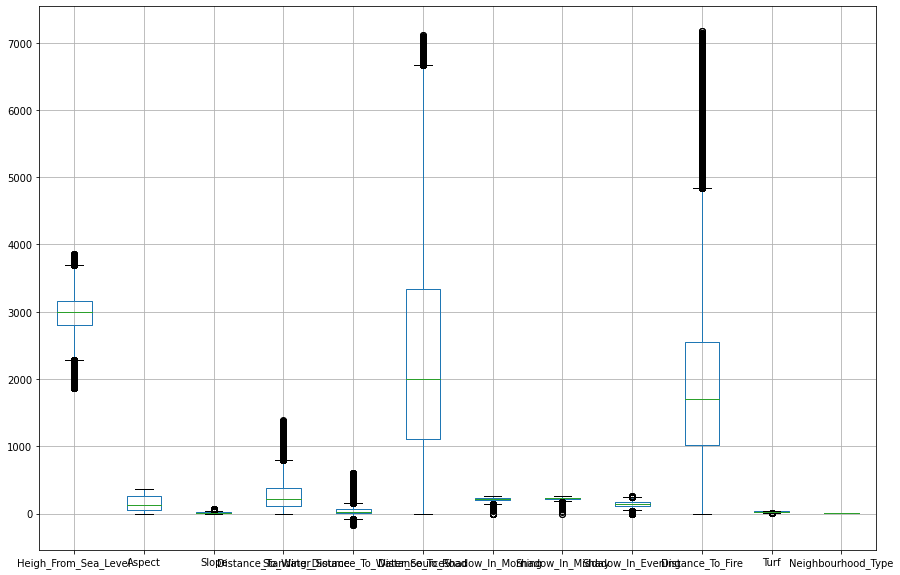

In [18]:
df.boxplot(columns, figsize = (15,10))

outliers detection using z-score

In [19]:

def detect_outliers_zscore(data):
  outliers = []
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
    # print(mean, std)
  for i in data:
    z_score = (i-mean)/std
    if (np.abs(z_score) > thres):
      outliers.append(i)
  return outliers


In [20]:
for j in range(len(columns)):
  print(columns[j],detect_outliers_zscore(df[columns[j]]))
  print('\n')

Heigh_From_Sea_Level [2112, 2047, 2090, 2109, 2016, 2109, 2090, 2080, 2091, 2016, 2091, 2072, 2113, 2092, 1969, 2036, 2033, 1959, 2018, 2045, 2002, 2065, 2118, 2026, 2052, 1964, 2092, 1983, 1908, 2082, 2049, 2000, 2055, 1990, 2011, 2084, 2086, 2109, 2050, 3844, 2106, 2097, 2103, 2088, 1979, 1962, 2075, 1996, 2118, 2072, 2089, 2116, 2103, 2105, 2106, 2096, 3810, 2119, 2074, 2008, 1962, 1938, 1983, 2119, 2100, 1891, 2050, 2052, 1950, 2032, 2002, 2036, 2117, 2078, 2104, 1936, 2037, 2066, 2077, 2065, 2117, 2043, 2082, 2107, 2097, 2041, 1987, 1966, 2091, 2061, 2104, 1926, 2016, 2042, 2120, 2115, 2058, 2065, 2099, 2102, 2084, 2017, 2054, 1896, 1883, 1992, 2108, 2112, 2028, 2000, 2005, 2059, 2058, 2111, 2001, 1982, 2116, 2025, 2066, 2046, 2094, 2094, 2072, 2081, 1988, 2105, 2050, 2076, 1982, 2113, 2040, 2061, 2077, 2016, 2081, 1958, 2033, 2079, 2075, 2053, 2094, 2100, 2059, 2017, 2079, 2046, 2119, 2065, 2004, 2046, 1941, 2004, 1955, 2074, 1998, 2032, 2039, 2090, 2078, 2107, 1987, 2019, 2026, 

handling outliers using quantile based flooring and capping technique.

Heigh_From_Sea_Level 2582.0
Heigh_From_Sea_Level 3273.0


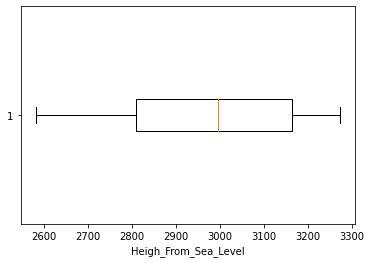

Aspect 24.0
Aspect 329.0


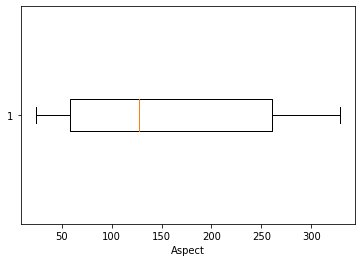

Slope 5.0
Slope 24.0


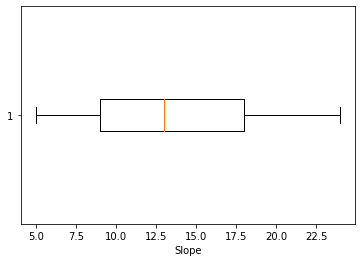

Distance_To_Water_Source 30.0
Distance_To_Water_Source 564.0


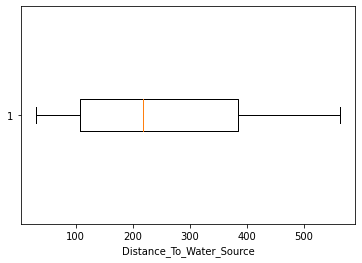

Standing_Distance_To_Water_Source 0.0
Standing_Distance_To_Water_Source 121.0


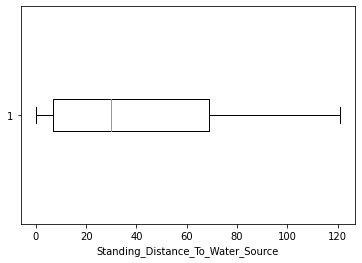

Distance_To_Road 589.0
Distance_To_Road 4795.0


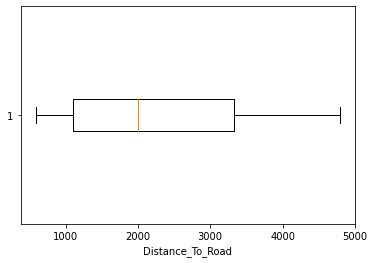

Shadow_In_Morning 176.0
Shadow_In_Morning 241.0


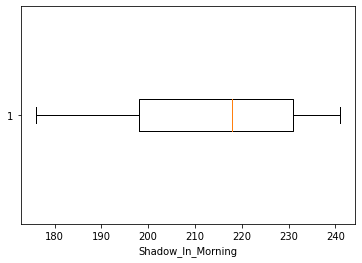

Shadow_In_Midday 199.0
Shadow_In_Midday 245.33333333333334


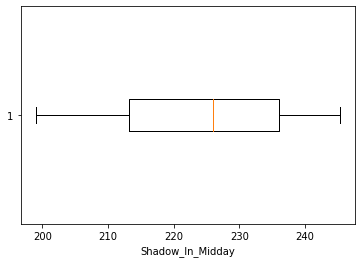

Shadow_In_Evening 95.0
Shadow_In_Evening 191.0


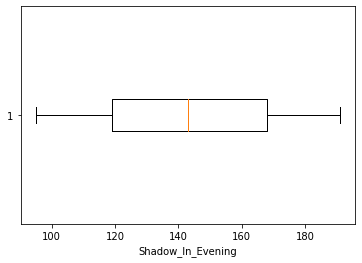

Distance_To_Fire 594.0
Distance_To_Fire 3751.0


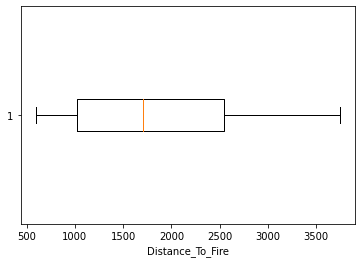

Turf 10.0
Turf 33.0


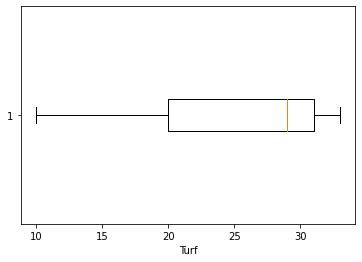

Neighbourhood_Type 1.0
Neighbourhood_Type 3.0


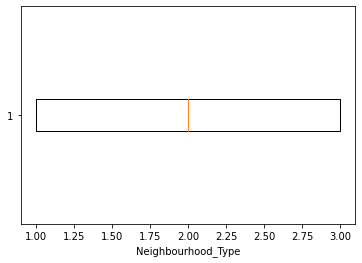

In [21]:
for i in range(len(columns)):
  a =  df[columns[i]].quantile(0.10)
  b =  df[columns[i]].quantile(0.90)
  print(columns[i],a)
  print(columns[i],b)
  df[columns[i]] = np.where(df[columns[i]] <a, a,df[columns[i]])
  df[columns[i]] = np.where(df[columns[i]] >b, b,df[columns[i]])
  plt.boxplot(df[columns[i]], vert=False)
  plt.xlabel(columns[i])
  plt.show()

statistical measures of our data

In [22]:
df.describe()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2972.261473,155.384250,13.693246,254.394859,42.136166,2302.468904,213.781908,224.370695,143.269042,1872.504175,24.373390,2.050184
std,221.638602,107.821433,6.116382,173.238029,40.348501,1385.521679,20.929497,14.671163,30.613734,995.651719,8.165365,0.972662
min,2582.000000,24.000000,5.000000,30.000000,0.000000,589.000000,176.000000,199.000000,95.000000,594.000000,10.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.250000,119.000000,1024.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,29.000000,2.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,236.000000,168.000000,2550.000000,31.000000,3.000000
max,3273.000000,329.000000,24.000000,564.000000,121.000000,4795.000000,241.000000,245.333333,191.000000,3751.000000,33.000000,3.000000


univariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f1316fed0>,
      dtype=object)

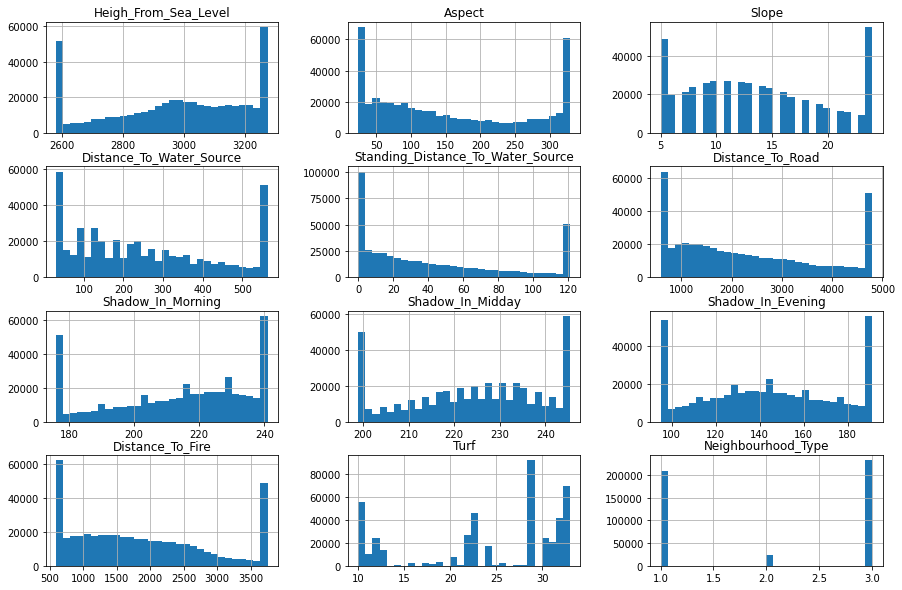

In [23]:
df.hist(bins=30, figsize=(15, 10))

Bivariate analysis

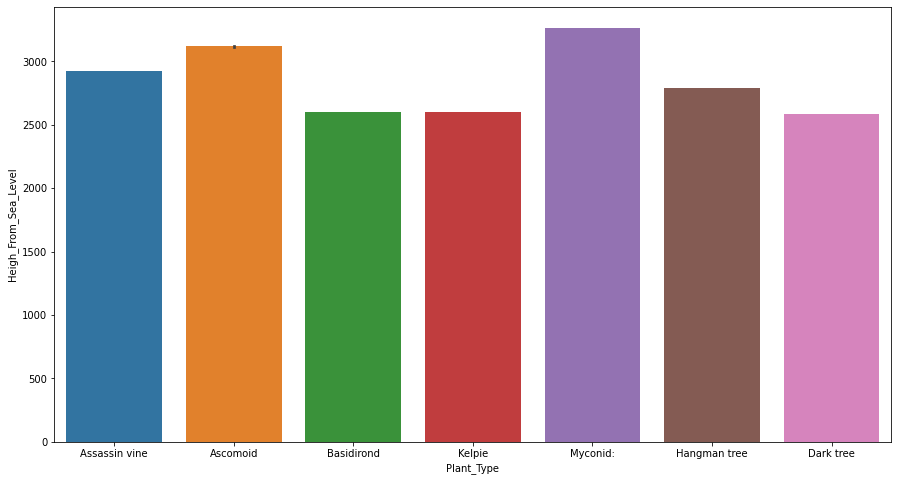

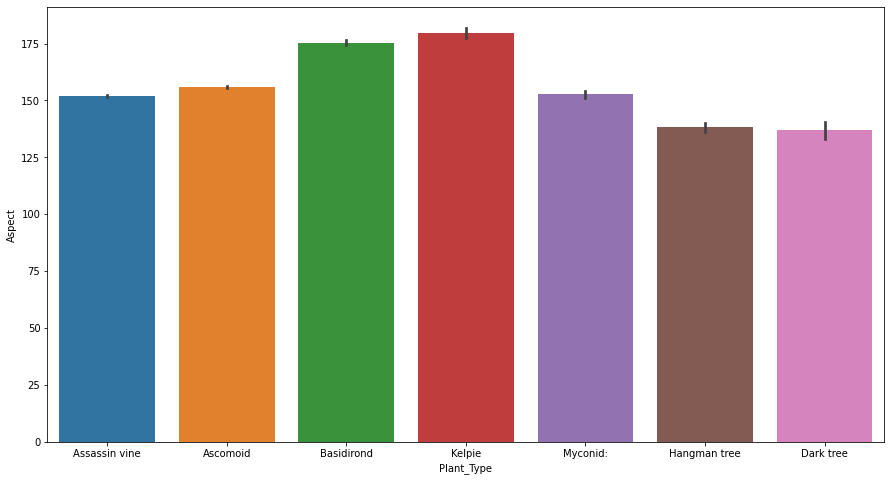

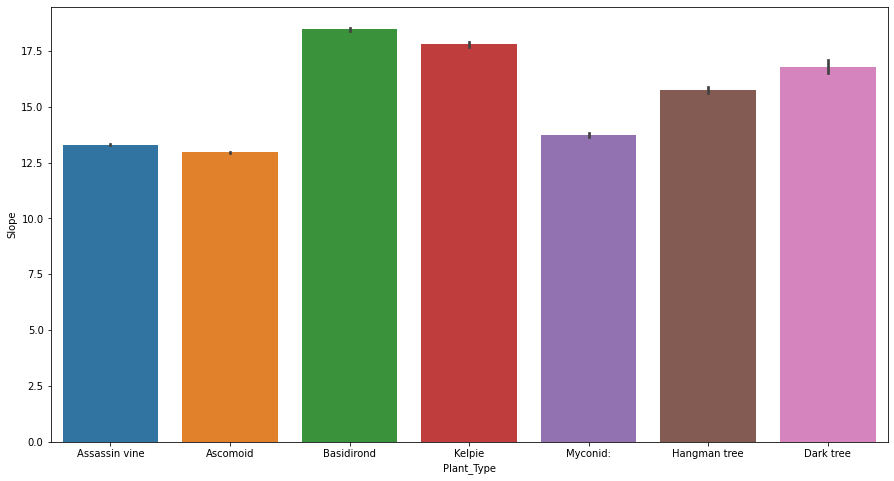

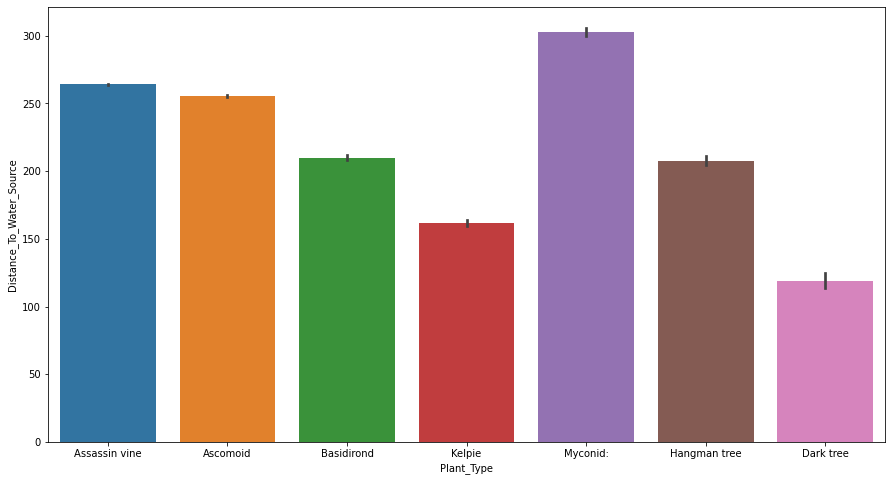

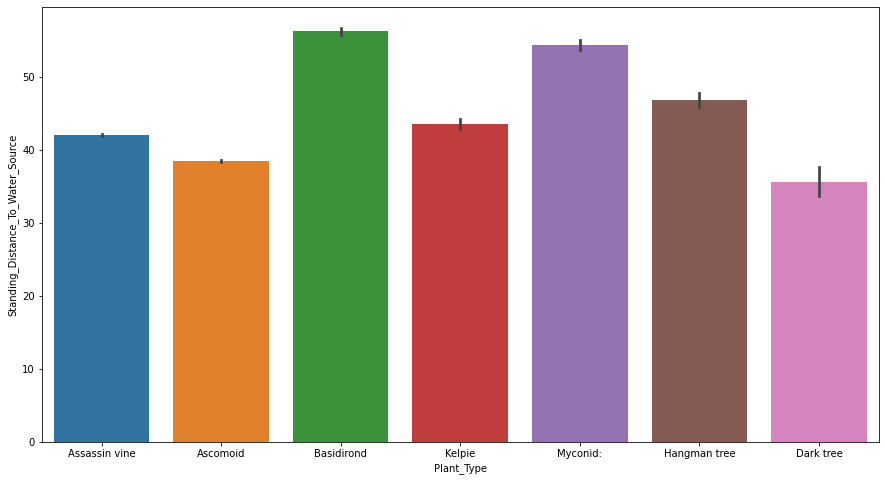

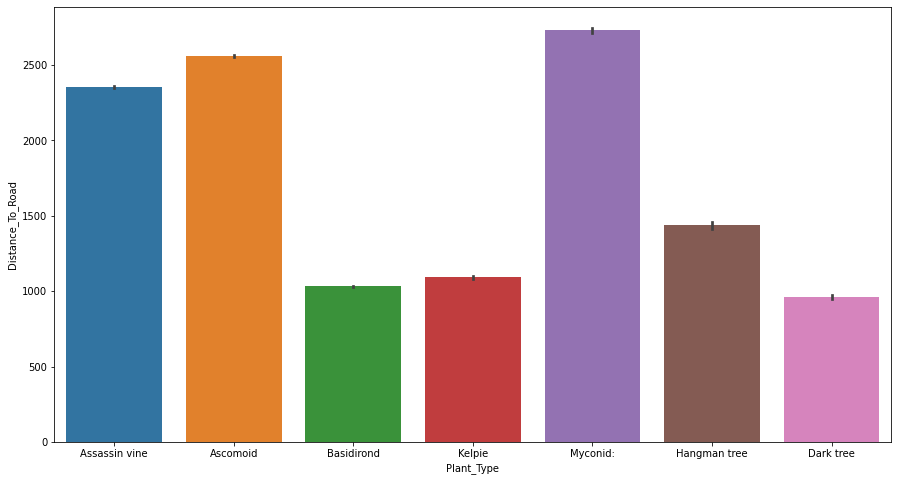

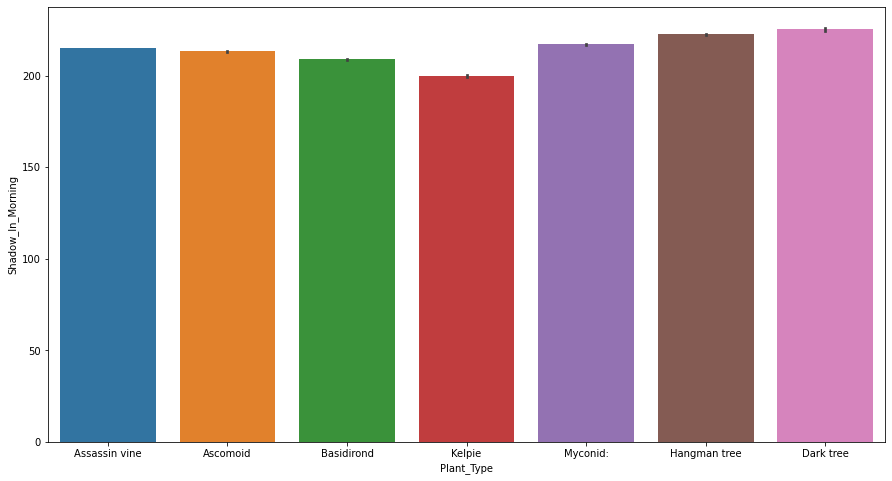

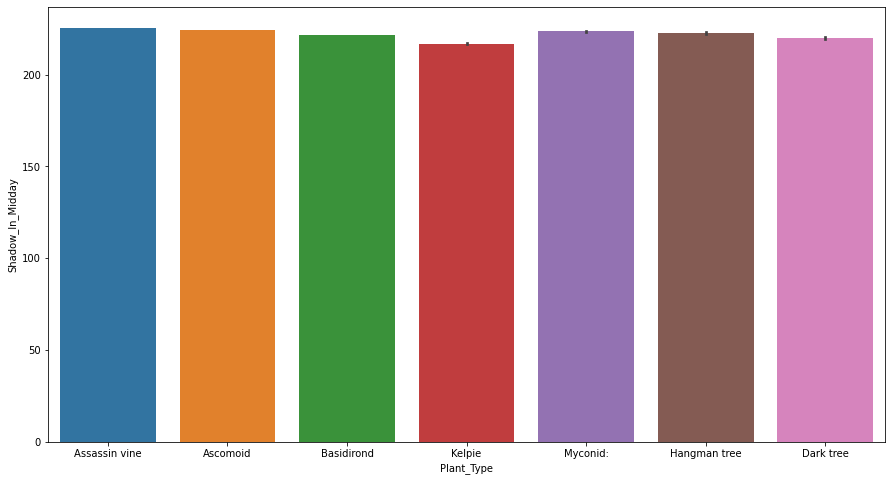

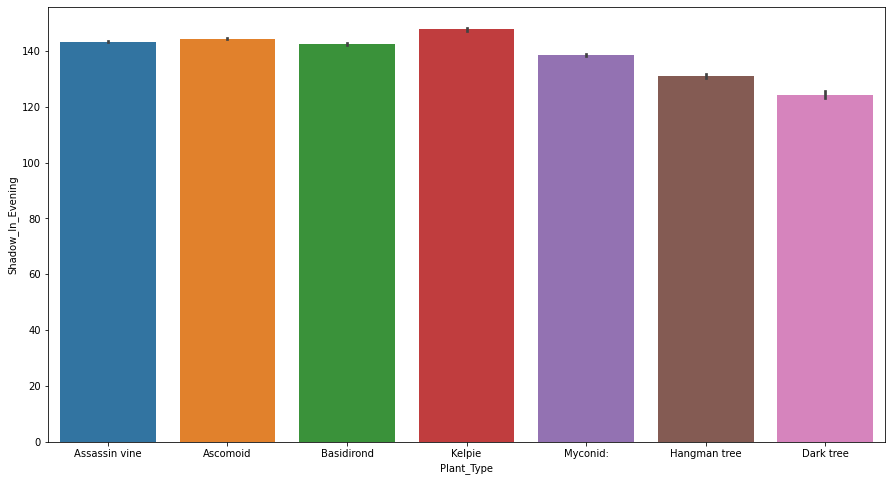

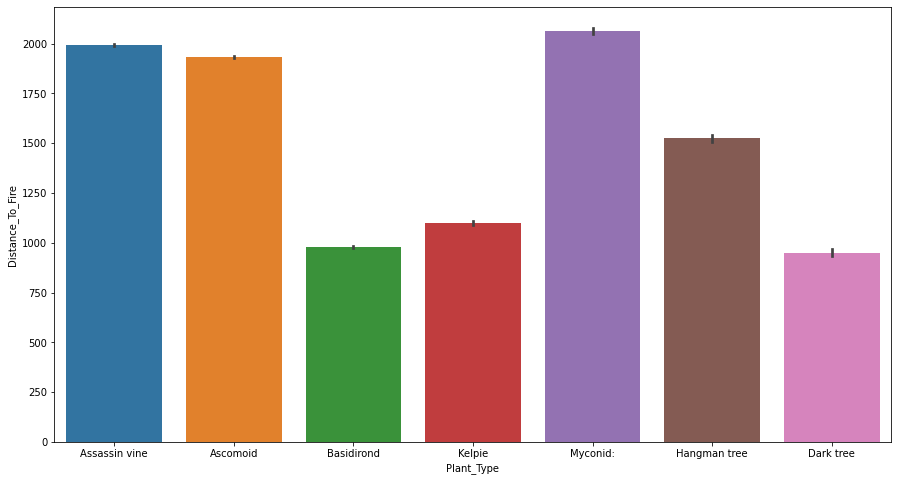

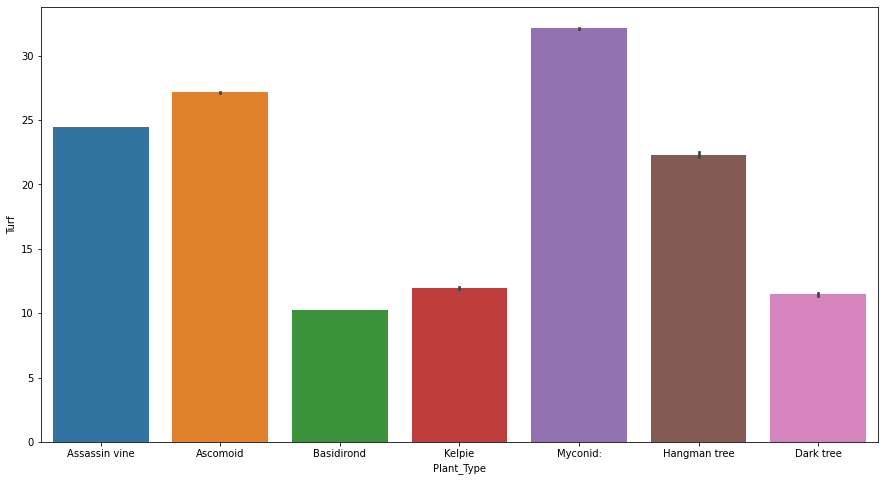

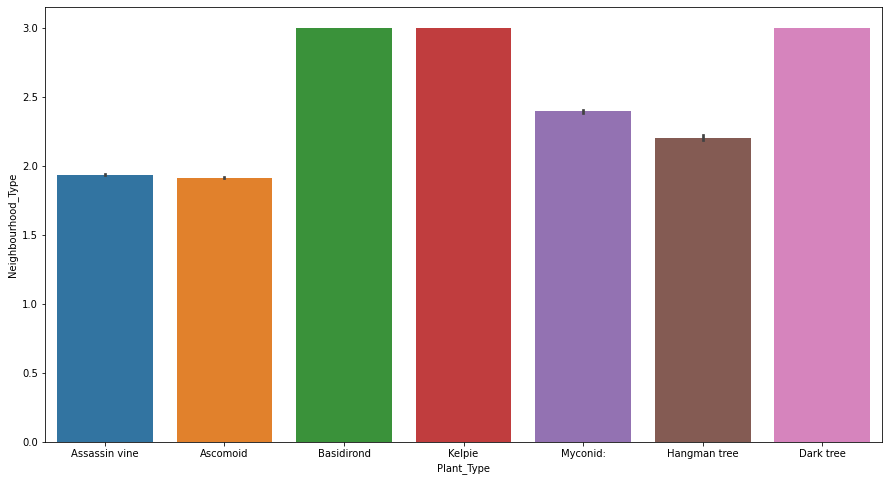

In [24]:
for l in columns[:12]:
  plt.figure(figsize=(15,8))
  sns.barplot(x=df['Plant_Type'],y=df[l])
  plt.show()

multivariate analysis shld be done

In [25]:
for i in range(len(columns)):
  #print(df[columns[i]].unique())
  print(df[columns[i]].value_counts())
  



2582.0    46698
3273.0    46488
2962.0     1374
2968.0     1335
2978.0     1334
          ...  
2615.0      204
2593.0      204
2650.0      199
2658.0      196
2586.0      196
Name: Heigh_From_Sea_Level, Length: 692, dtype: int64
24.0     47475
329.0    46732
45.0      5056
90.0      3762
135.0     3093
         ...  
251.0      518
269.0      500
244.0      484
224.0      397
226.0      395
Name: Aspect, Length: 306, dtype: int64
24.0    54639
5.0     48803
11.0    27020
10.0    26993
12.0    26554
13.0    25906
9.0     25699
14.0    24195
8.0     24079
15.0    23377
16.0    21206
7.0     21071
6.0     19614
17.0    18570
18.0    16941
19.0    15255
20.0    13256
21.0    11604
22.0    10866
23.0     9161
Name: Slope, dtype: int64
564.0    46921
30.0     46920
150.0    16682
60.0     15418
67.0     12275
         ...  
560.0      517
514.0      507
558.0      499
547.0      442
543.0      419
Name: Distance_To_Water_Source, Length: 129, dtype: int64
0.0      74973
121.0    47202
3.0   

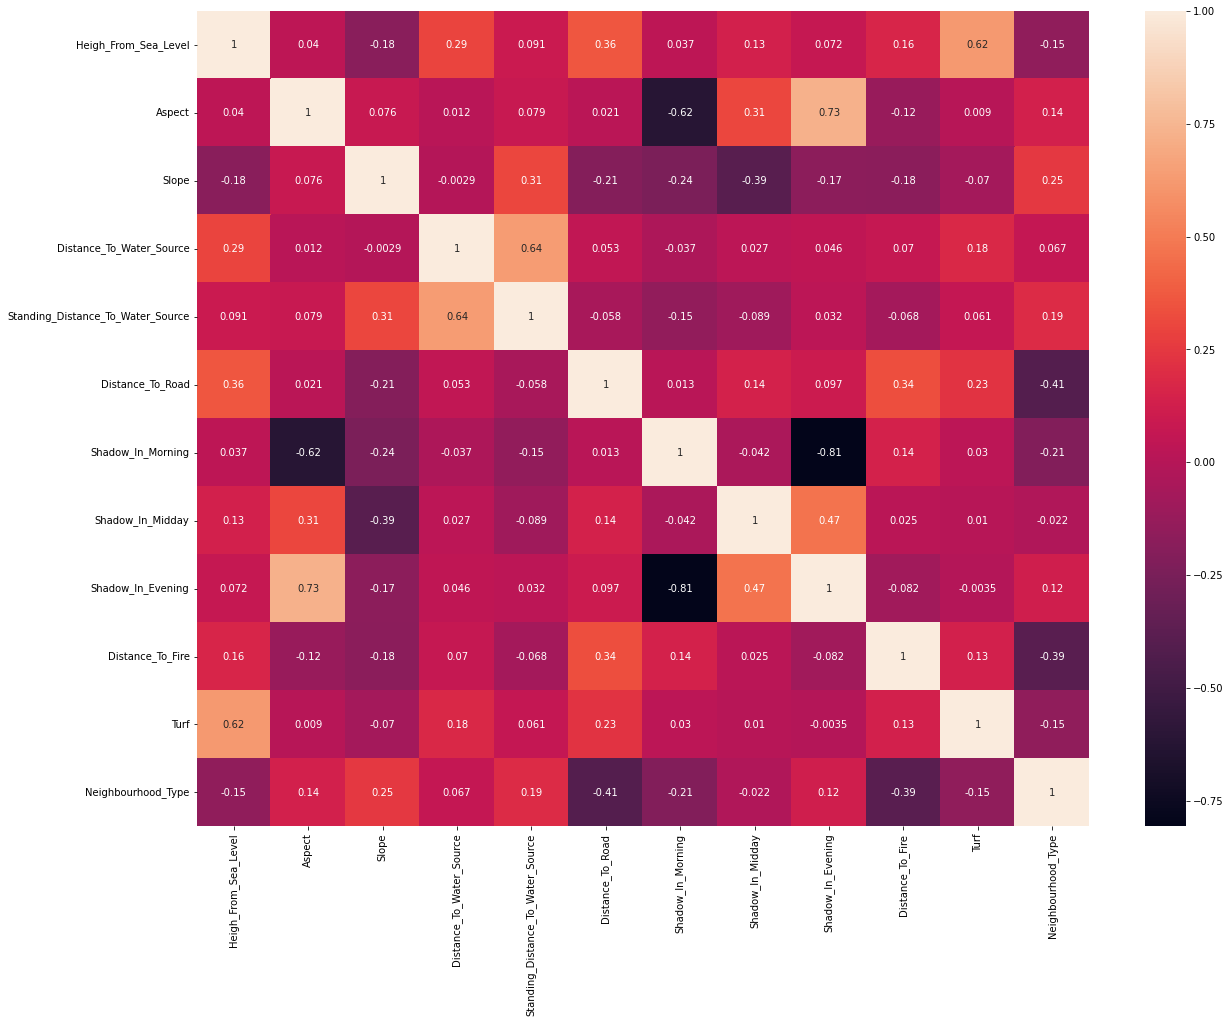

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [27]:
#for k in columns[:12]:
  #sns.displot(df, x=df[k], kind="kde")

In [28]:

##df['Heigh_From_Sea_Level_Log'] = np.log(df['Heigh_From_Sea_Level']+1)
#sns.distplot(df["Heigh_From_Sea_Level_Log"])

In [29]:
#df.skew()

data transformation

In [30]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df[columns[:12]]= scaler.fit_transform(df[columns[:12]].values)



In [31]:
#df[columns]

In [32]:
#sns.distplot(df['Distance_To_Water_Source'])

In [11]:
#label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Plant_Type']= label_encoder.fit_transform(df['Plant_Type']) 
print(df.head())
df
df.Plant_Type 

   Heigh_From_Sea_Level  Aspect  Slope  Distance_To_Water_Source  \
0                  2984      87     10                       234   
1                  3021     283     31                       630   
2                  3357     164     14                       618   
3                  2787     272     16                       150   
4                  3011     135      2                       576   

   Standing_Distance_To_Water_Source  Distance_To_Road  Shadow_In_Morning  \
0                                 62              3700                235   
1                                372              2155                122   
2                                151              1410                232   
3                                 40              2024                176   
4                                 95              5550                222   

   Shadow_In_Midday  Shadow_In_Evening  Distance_To_Fire  Turf  \
0             224.0                119              2751    29

0         1
1         1
2         0
3         1
4         1
         ..
464804    1
464805    0
464806    0
464807    1
464808    1
Name: Plant_Type, Length: 464809, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
  model.fit(x_train,y_train)
  print("accuracy is", model.score(x_test,y_test)*100)
  score = cross_val_score(model,x,y,cv=5)
  print("cross validationis",np.mean(score)*100)

In [13]:
x = df.drop(columns=['Plant_Type'])
y = df['Plant_Type']

In [14]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

accuracy is 93.00574428261011
cross validationis 92.82823697693892


In [16]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

accuracy is 95.72405929304448
cross validationis 95.71673520043574


In [18]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x , y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({1: 226705, 0: 169487, 2: 28488, 6: 16416, 5: 13931, 4: 7598, 3: 2184})
Resample dataset shape Counter({1: 226705, 0: 226705, 2: 226705, 5: 226705, 6: 226705, 4: 226705, 3: 226705})


In [19]:
x_smote.shape
y_smote.shape

(1586935,)

In [20]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
from xgboost import XGBClassifier
# reshampled dataset

# splitting again the dataset using smote splitting
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

#print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
#print('F1 score:',f1_score(y_test1, predict_y))

/Users/jyotsanasharma/Library/Python/3.8/lib/python/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/jyotsanasharma/Library/Python/3.8/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/jyotsanasharma/Library/Python/3.8/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)

model = RandomForestClassifier()
classify(model, x_smote, y_smote)

accuracy is 98.4189648599344
cross validationis 98.39880020290688


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)


model = DecisionTreeClassifier()
classify(model, x_smote, y_smote)